Created on Fri Feb 13 17:50:36 2015
@author: salter
# Extract profile of diamond SILs (solid immersion lenses).

Aim: Extract lens profile to provide data for lens profile optimisation procedure.

Uses intensity contrast between diamond and Pt regions in SEM images of lens cross-sections to determine boundary defining the lens shape.

User guide:
1. Select region of interst containing SIL and deposited Pt.
1b. (optional) Restrict 'colour' range (0-256) to increase contrast
2. Calculate average intensity for Pt and diamond (within SIL) regions: select start and end of Pt region at x=0 in truncated image; select end of SIL region along the lens centre in tuncated image
3. Decide where in the boundary between diamond and Pt the SIL edge should lie - enter value for Bndry_thrshld (e.g. 0.5 => intensity boundary is exatly half way between diamond and Pt intensities)

Acknowledgements: USTEM at TU Wien (focussed ion-beam milling and SEM images); Marie Curie Actions (funding).

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg #Plotting image data is supported by Pillow. Natively, matplotlib only supports PNG images. The commands shown below fall back on Pillow if the native read fails.
#from PIL import Image  
import numpy as np
import os

os.getcwd()

'd:\\MY FILES\\Projects\\Public\\Diamond lens profiling'

# Load and display raw SEM image

Text(0.39,0.61,'Diamond lens')

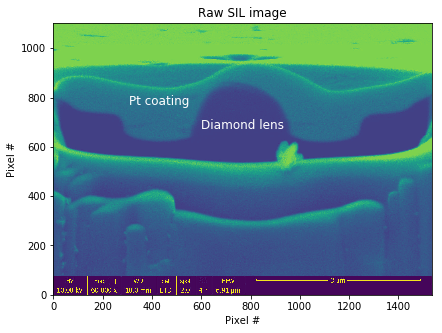

In [18]:
# Import image using mpimg
img = np.flipud(mpimg.imread(r'Xsect_images\EllipSIL1_LH1p24_cut58deg_x-sct_10kV_spt2_Rot4deg.jpg'))

#Plot original image 
f = plt.figure(figsize=(8,5))
imgplot = plt.imshow(img,origin='lower')
plt.title('Raw SIL image')

plt.xlabel('Pixel #')
plt.ylabel('Pixel #')

plt.annotate('Pt coating', xy=(0.2, 0.7), xycoords='axes fraction', color = 'w', fontsize=12)
plt.annotate('Diamond lens', xy=(0.39, 0.61), xycoords='axes fraction', color = 'w', fontsize=12)

# Input parameters

In [19]:
# Import image using mpimg
img=np.flipud(mpimg.imread(r'Xsect_images\EllipSIL1_LH1p24_cut58deg_x-sct_10kV_spt2_Rot4deg.jpg'))

#Image size in pixels
im_hght = np.shape(img)[0]
im_lgth = np.shape(img)[1]

# Select region of image for analysis (in pixel coordinates)
ymin = 625
ymax = 900
xmin = 500
xmax = 1010

#Parameters to enchance contrast (restrict colour range)
c_min = 50 #min is 0
c_max = 140 #max is 256 for 8-bit image

HFW = 6.91e-6 #Half field-width of SEM image
pxl_size = HFW/im_lgth
pxl_size_x = pxl_size*1.0 #Scale x and y in the case of mis-calibration of SEM length scales
pxl_size_y = pxl_size*1.0

#Params for determining avg intensity values in lens and in deposited Pt
y_Pt_start = 7 #y pixel value (at x=0) for beginning of Pt region
y_Pt_stop = 160 #y pixel value (at x=0) for end of Pt region
x_Aprx_LC = 250 #Approximate x-pixel value of lens centre (in truncated image)
y_lens_stop = 180 #y pixel value (at x=x_Aprx_LC) for end of lens region

# Determines intensity defining boundary between Pt and SIL (Bndry_thrshld=0.5 => intensity boundary is exatly half way between diamond and Pt intensities)
Bndry_thrshld = 0.55

# Flag determining if centre of lens defined by highest point (top) of the lens
CTL_flag = 0
#Else centre of lens is determined by edges of SIL
LTrFlr, RTrFlr = -9.12e-7, 9.67e-7 # Located edges of SIL (based on smoothened data before translation)

# Histogram of pixel grayscale

Text(0,0.5,'Count')

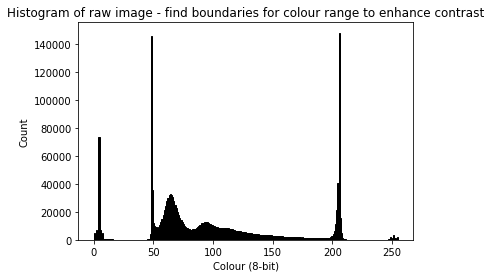

In [20]:
# Histogram of pixel 'colour' (8 bit image) to see where to restrict colour range for enchanced contrast
f1 = plt.figure()
plt.hist(img.flatten(), 256, fc='k', ec='k')
plt.title('Histogram of raw image - find boundaries for colour range to enhance contrast')
plt.xlabel('Colour (8-bit)')
plt.ylabel('Count')

# Show region of interest

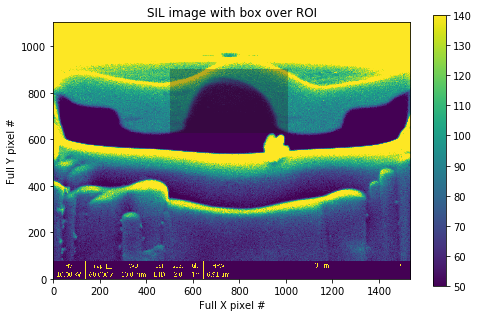

In [21]:
#Plot original image 
f2 = plt.figure(figsize=(8,5))
imgplot = plt.imshow(img,origin='lower')
plt.title('SIL image with box over ROI')

plt.xlabel('Full X pixel #')
plt.ylabel('Full Y pixel #')

#imgplot.set_cmap('hot')
imgplot.set_clim(c_min,c_max) # Restrict 'colour' range to enhance contrast
plt.colorbar()

# Box around region of interest
plt.axhspan(ymin=ymin, ymax=ymax, xmin=xmin/im_lgth, xmax=xmax/im_lgth, facecolor='0.1', alpha=0.3)

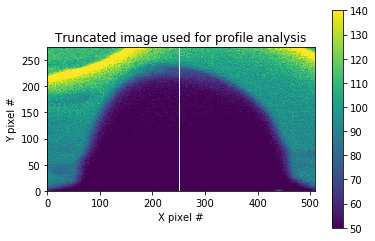

In [22]:
# Truncate image to selected area
img_trunc = img[ymin:ymax, xmin:xmax].copy()

f3 = plt.figure() #display truncated image
plt.title('Truncated image used for profile analysis')
plt.xlabel('X pixel #')
plt.ylabel('Y pixel #')

imgplot = plt.imshow(img_trunc,origin='lower')

#imgplot.set_cmap('hot')
plt.colorbar()
imgplot.set_clim(c_min,c_max)
plt.axvspan(x_Aprx_LC, x_Aprx_LC, ec='1', alpha=1, ls='dashed')

# Calculate avg. intensity values for Pt and lens regions 

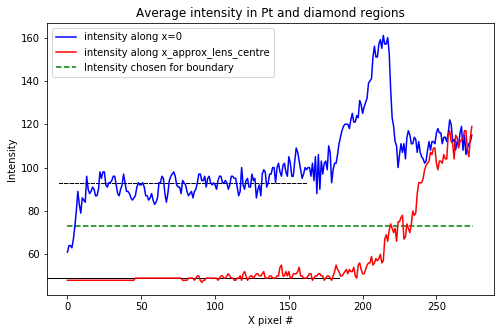

In [23]:
f4 = plt.figure(figsize=(8,5))
plt.title('Average intensity in Pt and diamond regions')

plt.plot(img_trunc[:,0], 'b-',label='intensity along x=0')
plt.plot(img_trunc[:,x_Aprx_LC],'r-',label='intensity along x_approx_lens_centre')

plt.xlabel('X pixel #')
plt.ylabel('Intensity')

# Calculate average intensity values for Pt and lens regions
Pt_AvgInt = np.average(img_trunc[y_Pt_start:y_Pt_stop,0])
SIL_AvgInt = np.average(img_trunc[0:y_lens_stop,x_Aprx_LC])
#add these average lines to the intensity plot
plt.axhspan(Pt_AvgInt,Pt_AvgInt, xmin=(y_Pt_start/img_trunc.shape[0]), xmax=(y_Pt_stop/img_trunc.shape[0]), ec='0', alpha=1, ls='dashed')
plt.axhspan(SIL_AvgInt,SIL_AvgInt, xmin=0, xmax=(y_lens_stop/img_trunc.shape[0]), ec='0', alpha=1, ls='dashed')

# Define intensity value for the boundary between SIL and Pt layer.
Bndry_Int = SIL_AvgInt + Bndry_thrshld*(Pt_AvgInt-SIL_AvgInt)
plt.hlines(Bndry_Int, xmin=0, xmax=len(img_trunc[:,0]), colors='g', linestyles='--', label='Intensity chosen for boundary')
plt.legend(loc=0)

# Extract SIL profile 
Use boundary defined between diamond and Pt to extract profile

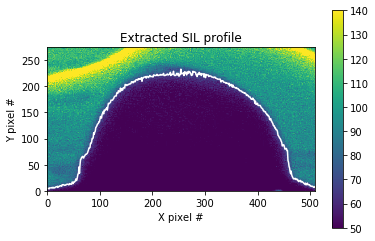

In [24]:
SIL_prof = np.zeros((np.shape(img_trunc)[1],2)) # np array for SIL profile (x and y coordiantes)

# Sweep along x-axis in img_trunc
for i in np.arange(0,np.shape(img_trunc)[1]): 
    SIL_prof[i,0] = i

    # Sweep upwards through each vertical line in trunctated image
    for j in np.arange(0,np.shape(img_trunc)[0]): 

        if (img_trunc[j,i]-Bndry_Int)>0 and j>0:
            #SIL_prof=min(abs(img_trunc[j-1,i]-Bndry_Int),img_trunc[j,i]-Bndry_Int)
            #SIL_prof=min( np.argmin(img_trunc[j-1,i]-Bndry_Int),img_trunc[j,i]-Bndry_Int)
            dummy_arg = np.argmin(np.absolute(img_trunc[j-1:j+1,i]-Bndry_Int)) #dummy to find argument of value closest to Bndry_Int (output=0 or 1)
            SIL_prof[i,1]=j-1+dummy_arg
            break


# Plot extracted SIL profile over SEM image
f5 = plt.figure()
imgplot = plt.imshow(img_trunc,origin='lower')
plt.title('Extracted SIL profile')
plt.xlabel('X pixel #')
plt.ylabel('Y pixel #')
plt.colorbar()
imgplot.set_clim(c_min,c_max) # Restrict 'colour' range to enhance contrast
plt.plot(SIL_prof[:,1], 'w-')


# Smoothen profile

In [25]:
#First translate profile so that origin is at top of lens
SIL_prof[:,1] -= SIL_prof[:,1].max() #set top of lens to y=0
ind = SIL_prof[:,1].argmax() #index of top of lens
centre = SIL_prof[ind,0] #x value at centre of lens
SIL_prof[:,0] -= centre #x-offset data so that centre of lens is at x=0

# Convert units to um's
SIL_prof[:,0] = SIL_prof[:,0]*pxl_size_x
SIL_prof[:,1] = SIL_prof[:,1]*pxl_size_y

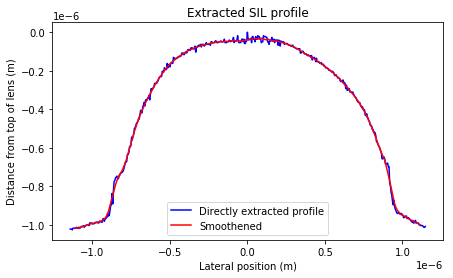

In [26]:
NElmts2Avg = 7 # No. of elements either side of point to be averaged. i.e. 2*NElmts2Avg+1 points are used for averaging each point
lgth = np.shape(SIL_prof)[0]
SIL_prof_smooth = np.zeros((lgth-2*NElmts2Avg, 2)) # Cut off points at end that cannot be smoothened
SIL_prof_smooth[:,0] = SIL_prof[NElmts2Avg:lgth-NElmts2Avg, 0]

# Perform averaging/smoothening
for k in np.arange(NElmts2Avg, lgth-NElmts2Avg):
    avg = np.sum(SIL_prof[(k-NElmts2Avg):(k+NElmts2Avg+1),1]/(2*NElmts2Avg+1))        
    SIL_prof_smooth[k-NElmts2Avg,1] = avg

# Plot SIL_profile in um's
f6 = plt.figure(figsize=(7, 4))
plt.plot(SIL_prof[:,0],SIL_prof[:,1], '-b', label='Directly extracted profile')
plt.plot(SIL_prof_smooth[:,0],SIL_prof_smooth[:,1], '-r', label='Smoothened')
plt.title('Extracted SIL profile')
plt.xlabel('Lateral position (m)')
plt.ylabel('Distance from top of lens (m)')
plt.ticklabel_format(style='sci', scilimits=(0,0))
plt.legend()

plt.savefig(r'Extracted_lens_profile.png',dpi=300)

## Save profile data

In [27]:
np.set_printoptions(threshold=np.nan)
f1 = open(r'Extracted_lens_profile.txt', 'w')
a=str(SIL_prof).replace('[','').replace(']','')
f1.write(a)
f1.close()

np.set_printoptions(threshold=2)